<center><img src="images/MLU-NEW-logo.png" alt="drawing" width="400" style="background-color:white; padding:1em;" /></center> <br/>


# <a name="0">Improve Factual Consistency Part 3 </a>
## <a name="0">Improving Factual Consistency and Explainability using LLM Debates </a>

### Glossary of Terms
- Naive Judge : This LLM has **no** access to transcript but only question and two summaries. Measure the baseline performance.
- Expert Judge : This LLM has access to transcript along with question and two summaries
- Question asked to LLM (in all experiments): It is always the same: `Which one of these summaries is the most factually consistent one?`

## Dataset
Our dataset is distilled from the Amazon Science evaluation benchmark dataset called <a href="https://github.com/amazon-science/tofueval">TofuEval</a>. 10 summaries have been curated from the [MediaSum documents](https://github.com/zcgzcgzcg1/MediaSum) inside the tofueval dataset for this notebook. 

MediaSum is a large-scale media interview dataset contains 463.6K transcripts with abstractive summaries, collected from interview transcripts and overview / topic descriptions from NPR and CNN.


## Notebook Overview

In this notebook, we navigate the LLM debating technique with more persuasive LLMs having two expert debater LLMs (Claude and Mixtral) and one judge (using Claude - we can use others like Mistral/Mixtral, Titan Premier) to measure, compare and contrast its performance against other techniques like self-consistency (with naive and expert judges) and LLM consultancy. This notebook is an adapted and partial implementation of one of the ICML 2024 best papers, <a href="https://arxiv.org/pdf/2402.06782"> Debating with More Persuasive LLMs Leads to More Truthful Answers </a> on a new and different Amazon Science evaluation dataset <a href="https://github.com/amazon-science/tofueval">TofuEval</a>. 


- Part 1.  Demonstrate typical Standalone LLM approach

- Part 2.  Demonstrate the LLM Consultancy approach and compare with Part 1.

- Part 3.  **[THIS notebook]**  Demonstrate the LLM Debate approach and compare with other methods.


<div style="border: 4px solid coral; text-align: left; margin: auto; padding-left: 20px; padding-right: 20px">
    While this notebook(part 1, 2 and 3) compares various methods and demonstrates the efficacy of LLM Debates in notebook part 3 with a supervised dataset, the greater benefit is possible in unsupervised scenarios where ground truth is unknown and ground truth alignment and/or curation is required. Human annotation can be expensive plus slow and agreement amongst human annotators adds another level of intricacy. A possible `scalable oversight direction could be this LLM debating technique to align on the ground truth options` via this debating and critique mechanism by establishing factual consistency(veracity). This alignment and curation of ground truth for unsupervised data could be a possible win direction for the debating technique in terms of cost versus benefit analysis.
</div>
<br/>


#### Notebook Kernel
Please choose `conda_python3` as the kernel type of the top right corner of the notebook if that does not appear by default.


## LLM Access

We will need access to Anthropic Claude v3 Sonnet, Mistral 7b and  Mixtral 8x7b LLMs for this notebook.

[Anthropic Claude v3(Sonnet)](https://www.anthropic.com/news/claude-3-family) , [Mixtral 8X7B](https://mistral.ai/news/mixtral-of-experts/), [Mistral 7B](https://mistral.ai/news/announcing-mistral-7b/) - all of them pre-trained on general text summarization tasks.

## Use-Case Overview

To demonstrate the measurement and improvement of factual consistency (veracity) with explainability in this notebook, we conduct a series of experiments to choose the best summary for each transcript. In each experiment, we measure the veracity and correctness of the summaries generated from transcripts and improve upon the decision to choose the correct one via methods like LLM consultancy and LLM debates.

The <b>overall task in this notebook</b> is choose which one of the two summaries is most appropriate for a given transcript. There are a total of 10 transcripts and each transcript has 2 summaries - one correct and other incorrect. The incorrect summaries have various classes of errors like `Nuanced Meaning Shift`, `Extrinsic Information` and  `Reasoning errors`. 

In this notebook we will conduct the following set of experiment combinations to measure, compare and contrast LLM debating techniques with others.


## Experiments
For each of these experiments we flip the side of the argument the LLM takes to account for `position bias` and `verbosity bias` and re-run each experiment.

**Note** We always use the same Judge LLM (Mistral 7B) across all the experiments in this notebook


---

### Experiment 4: (LLM Debate) 
<center><img src="images/veracitylab01-llm-debate.png" alt="In this image, we depict the flow of LLM Debate. First Debater LLMs like Claude and Mixtral argue their side
based on transcript contents. Next each argument is saved to a file and
the next debater picks up the entire argument history before posting their next argument. Finally, once all 3 rounds of arguments are over, the Judge LLM reads all the arguments and decides which summary is the most factually consistent answer."  height="700" width="700" style="background-color:white; padding:1em;" /></center> <br/>

We use Claude 3 as first debater and Mixtral as second debater with Claude as Judge. We let the debater argue their sides and finally let the judge decide which argument is better. This continues for N(=3 in this notebook) rounds. We flip Claude and Mistral argument sides in experiments 4a and 4b and take average of the experiment results as final accuracy. This accounts for errors due to position (choosing an answer due to its order/position) and verbosity bias (one answer longer than the other)

##### Experiment 4a: (Claude v3 argues for answer A, Mixtral argues for Answer B): 
Claude v3(Sonnet) argues for answer A(Ground Truth:False Answer) and generates rationale why that answer is correct. Mixtral 8X7B argues for answer B(Ground Truth:True Answer) and generates rationale why that answer is correct. This continues for N(=3 in this notebook) rounds. At the end of the debate, Claude as a judge adjudicates whether Claude's or Mixtral's rationale is correct and chooses a side to give the final answer.

#####  Experiment 4b: (Claude v3 argues for answer B, Mixtral argues for Answer A): 
Claude v3(Sonnet) argues for answer B(Ground Truth:True Answer) and generates rationale why that answer is correct. Mixtral 8X7B argues for answer A(Ground Truth:False Answer) and generates rationale why that answer is correct. This continues for N(=3 in this notebook) rounds. At the end of the debate, Claude as a judge adjudicates whether Claude's or Mixtral's rationale is correct and chooses a side to give the final answer.

---
## Evaluation Metrics
For each type of experiment we evaluate the accuracy of the answers for that experiment/method type to compare and contrast each method at the end.

For the final experiment on LLM Debate, we also calculate the `win rate` of the LLM debaters to evaluate which of the LLMs actually got most of the answers right as adjudicated by the judge. This can be considered a mechanism to choose one LLM over the other given this use-case.

---


This notebook notebook has the following sections:

1. <a href="#1">Dataset exploration</a>
2. <a href="#2">Accuracy of LLM Debate</a>
3. <a href="#3">Compare Accuracies across experiments</a>
4. <a href="#4">Choose expert LLM using Win Rate measured during LLM Debate (Experiment 4) </a>
5. <a href="#5">Challenge exercise and notebook quiz</a>
    
Please work top to bottom of this notebook and don't skip sections as this could lead to error messages due to missing code.

---

In [1]:
%%capture
!pip3 install setuptools==70.0.0

In [2]:
%%capture
!pip install -q -U pip --root-user-action=ignore
!pip3 install -q -r requirements.txt --root-user-action=ignore

In [3]:
# We load all prompts from a separate file prompts.py
%load_ext autoreload
%autoreload 2
from prompts import *

%load_ext autoreload
%autoreload 2
from mlu_utils.veracity_utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
clean_up_files_in_dir("./transcripts")
clear_file_contents("./log_files/notebook_run_logs.log")

clear_file_contents dir :: <built-in function dir>


In [5]:
import boto3
import re, time
import random
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

from langchain.llms.bedrock import Bedrock
from langchain.prompts import PromptTemplate
from IPython.display import Markdown
from collections import Counter

from IPython.display import Markdown, display
import logging
import boto3, warnings
import pandas as pd
# Supress warnings
warnings.filterwarnings("ignore")
logging.basicConfig(filename='log_files/notebook_run_logs.log', encoding='utf-8', level=logging.INFO)
logger = logging.getLogger(__name__)
logger.info("----- Test logging setup -----")


### Bedrock Model Access check

In [6]:
#test if all bedrock model access has been enabled 
test_llm_calls()

Claude v3 sonnet looks good
Mixtral 8X7B looks good
Titan Express looks good
Mistral 7B looks good
All required model access look good


### Constants used in this notebook

In [7]:
number_of_rounds = 3
question = "Which one of these summaries is the most factually consistent one?"
total_data_points = 10

### <a name="1">Dataset Exploration</a>
(<a href="#0">Go to top</a>)


In [8]:
# pre-process the dataset
answers_df = pd.read_csv("./tofueval_dataset/mediasum_dev_doc_id_group_final_dual_summaries_manual_final_dataset.csv")
#answers_df.head()
interview_df = pd.read_csv("./tofueval_dataset/mediasum_dev_doc_complete_final.csv")
#interview_df.head()

result = pd.merge(answers_df, interview_df, on="doc_id")
final_dataset = result[["doc_id", "topic", "summ_sent_incorrect_original", "summ_sent_correct_manual", "exp", "type", "source"]]
final_dataset.head()

,doc_id,topic,summ_sent_incorrect_original,summ_sent_correct_manual,exp,type,source
0,CNN-104129,Decline of American automobile industry,"GM lost $10B in 2005, continues losing market ...","GM lost $10.6B in 2005, continues losing marke...","It's not ""$10B"" but ""$10.6B""",Nuanced Meaning Shift,DOBBS: General Motors today announced it will ...
1,CNN-138971,Diplomatic efforts,North Korea has announced plans to launch a sa...,Diplomatic efforts to secure the release of Am...,"The launch of a satellite is not mentioned, bu...",Extrinsic Information,ROBERTS: Welcome back to the Most News in the ...
2,CNN-139946,Filibuster-Proof Majority,This filibuster-proof majority means Democrats...,"Democrats gain 60 seats in Senate, giving them...",This is an unsupported statement,Extrinsic Information,ANNOUNCER: This is CNN breaking news.\nMALVEAU...
3,CNN-145383,Educate to Innovate Campaign,The private sector has committed over $260 mil...,Over $260 million in private funding will supp...,"The document does not state that ""reaching you...",Reasoning Error,HARRIS: And President Obama in the Eisenhower ...
4,CNN-164885,Cuban celebration and government gathering,"170,000 Cubans have private businesses.",Cuba celebrated the 50th anniversary of their ...,"The document says that 170,000 Cubans have app...",Nuanced Meaning Shift,FEYERICK: We'll get to Donald Trump's campaign...


### <a name="2">LLM Debate: 2 expert LLMs, 1 naive judge - LLM-1 arguing for 1st summary</a>
(<a href="#0">Go to top</a>)

In this LLM Debate - Claude(LLM-1) defends incorrect Summary and Mixtral(LLM-2) defends correct summary.

Claude v3(Sonnet) argues for answer A(Ground Truth:False Answer) and generates rationale why that answer is correct. Mixtral 8X7B argues for answer B(Ground Truth:True Answer) and generates rationale why that answer is correct. This continues for N(=3 in this notebook) rounds. At the end of the debate, Claude as a judge adjudicates whether Claude's or Mixtral's rationale is correct and chooses a side to give the final answer.

In [9]:
%%time

for index, row in final_dataset.iterrows():
    time.sleep(10) # avoid throttling exceptions
    debate_id = row['doc_id']
    answer_a = row['summ_sent_correct_manual']
    answer_b = row['summ_sent_incorrect_original']
    complete_interview_transcript = row['source']
    
    #### defending false - Claude
    claude_defending_summary=answer_b
    claude_opposing_summary=answer_a

    #### defending true - Mixtral
    mixtral_defending_summary=answer_a
    mixtral_opposing_summary=answer_b

    logger.info(f"-------------2 model Debate -> Debate_id {debate_id}-------------------")

    #### Consultancy Claude - defending true - 3 rounds
    delete_file(f"./transcripts/full_transcript_debate_{debate_id}.log")
    for round_number in range(number_of_rounds):
        time.sleep(10) # avoid throttling exceptions
        print(f"=========== START OF 2 model DEBATE debate_id {debate_id} Round #1..{round_number + 1} ======= \n")
        logger.info(f"START Debate with Claude Debate_id {debate_id} Round #{round_number + 1} >>>>>> \n") 
        claude_debate_response = invoke_claude_v3(debate_id = debate_id,
                         question=question,
                         round_number = round_number + 1,
                         summary_defending = claude_defending_summary, 
                         summary_opposing = claude_opposing_summary, 
                         complete_interview = complete_interview_transcript,
                         debate=True
                         )

        logger.info(f" >>>>> claude_debate_response Round #{round_number + 1} >>>>> {claude_debate_response}")
        logger.info(f"END Debate with Claude Round #{round_number + 1} >>>>>> \n")

        mixtral_debate_response = invoke_mistral(debate_id = debate_id,
                     question=question,
                     round_number = round_number + 1,
                     summary_defending = mixtral_defending_summary, 
                     summary_opposing = mixtral_opposing_summary, 
                     complete_interview = complete_interview_transcript, 
                     )

        logger.info(f" >>>>> mixtral_debate_response Round #{round_number + 1} >>>>> {mixtral_debate_response}")
        logger.info(f"END Debate with Mixtral Round #{round_number + 1} >>>>>> \n")
    print(f"=========== END OF 2 model DEBATE debate_id {debate_id} Round #1..{round_number + 1} ======= \n")
    

=========== START OF 2 model DEBATE debate_id CNN-104129 Round #1..1 ======= 

=========== START OF 2 model DEBATE debate_id CNN-104129 Round #1..2 ======= 

=========== START OF 2 model DEBATE debate_id CNN-104129 Round #1..3 ======= 

=========== END OF 2 model DEBATE debate_id CNN-104129 Round #1..3 ======= 

=========== START OF 2 model DEBATE debate_id CNN-138971 Round #1..1 ======= 

=========== START OF 2 model DEBATE debate_id CNN-138971 Round #1..2 ======= 

=========== START OF 2 model DEBATE debate_id CNN-138971 Round #1..3 ======= 

=========== END OF 2 model DEBATE debate_id CNN-138971 Round #1..3 ======= 

=========== START OF 2 model DEBATE debate_id CNN-139946 Round #1..1 ======= 

=========== START OF 2 model DEBATE debate_id CNN-139946 Round #1..2 ======= 

=========== START OF 2 model DEBATE debate_id CNN-139946 Round #1..3 ======= 

=========== END OF 2 model DEBATE debate_id CNN-139946 Round #1..3 ======= 

=========== START OF 2 model DEBATE debate_id CNN-145383 R

## JUDGE for Regular Debate : LLM-Claude arguing for 1st summary, LLM-Mixtral arguing for 2nd summary

In [10]:
%%time

debate_judge_regular_answers = list()
for index, row in final_dataset.iterrows():
    time.sleep(10) # avoid throttling exceptions
    debate_id = row['doc_id']
    answer_a = row['summ_sent_correct_manual']
    answer_b = row['summ_sent_incorrect_original']
    complete_interview_transcript = row['source']
    logger.info(f"-------------DEBATE  JUDGE Debate_id {debate_id}-------------------")

    judge_response = invoke_claude_judge_debate(debate_id = debate_id,
                              question=question,
                 answer_a = answer_a,
                 answer_b = answer_b)
    debate_judge_regular_answers.append(extract_final_answer(judge_response, flipped=False))
    logger.info(f" >>>>> invoke_mistral_judge_debate - judge_response  >>>>> {judge_response}")
    # Print the final response 
    format_final_response(debate_id, 
                          round_num=1, 
                          question=question, 
                          answer_a=answer_a, 
                          answer_b=answer_b, 
                          judge_response=judge_response)
print(debate_judge_regular_answers)

invoke_claude_judge_debate :: transcript_filename >>>> /home/ec2-user/SageMaker/improve-factual-consistency-with-llm-debate-technique/transcripts/full_transcript_debate_CNN-104129.log


,Debate ID,Round #,Task Question,Judge Response
0,CNN-104129,1,"Which one of these summaries is the most factually consistent one? Answer A:GM lost \$10.6B in 2005, continues losing market share. Answer B:GM lost \$10B in 2005, continues losing market share.","<thinking>1. Strengths and weaknesses of arguments:- expert_debater_sonnet_v3 argues that the \$10B approximation in Answer B captures the essence of GM's massive losses and aligns with the key fact of losing market share. This is a reasonable argument, but it relies on an unverified quote for the \$10B figure.- expert_debater_mixtral_8_7B argues that Answer A with the precise \$10.6B figure is more accurate and directly matches the verified quote from the story. This is a strong argument based on evidence from the verified quote.2. Evaluating which answer is likely correct:- Answer A states ""GM lost \$10.6B in 2005, continues losing market share.""- The verified quote is <v quote>\$10.6 billion loss in 2005</v quote>, which directly supports the \$10.6B figure in Answer A.- Both answers correctly capture the detail of GM losing market share, supported by the verified quote <v quote>The company continues to lose market share.</v quote>- While the \$10B approximation in Answer B is close, Answer A with the precise \$10.6B figure is more factually consistent with the verified quote from the story.3. Answer chosen as correct: Answer AFinal Answer: A</thinking>"


invoke_claude_judge_debate :: transcript_filename >>>> /home/ec2-user/SageMaker/improve-factual-consistency-with-llm-debate-technique/transcripts/full_transcript_debate_CNN-138971.log


,Debate ID,Round #,Task Question,Judge Response
0,CNN-138971,1,"Which one of these summaries is the most factually consistent one? Answer A:Diplomatic efforts to secure the release of American journalists Laura Ling and Euna Lee, who are accused of spying in North Korea and face trial, are ongoing. Answer B:North Korea has announced plans to launch a satellite into orbit, which the US sees as a cover for testing ballistic missile technology.","<thinking>1. Evaluating the arguments:- expert_debater_sonnet_v3 argues for Answer B, citing the quote ""<v quote>North Korea angered the world with recent nuclear test and missile launches.</v quote>"" as evidence that the story covers North Korea's controversial missile and nuclear activities. This is a verified quote, lending credibility to their argument.- expert_debater_mixtral_8_7B argues for Answer A, citing quotes like ""<v quote>Trapped in one of the most isolated countries in the world, North Korea, imprisoned, accused of spying and awaiting trial. This is what American journalists Laura Ling and Euna Lee are facing.</v quote>"" and ""<v quote>With his wife's trial just one day away, Laura Ling's husband said the strain has been unbearable.</v quote>"" as evidence that the story's main focus is on the journalists' situation. These are also verified quotes, supporting their argument.2. Considering which answer is more likely to be correct:- Both debaters present valid arguments supported by verified quotes from the story.- However, expert_debater_mixtral_8_7B's argument that the story primarily focuses on the journalists' situation and their imminent trial seems more convincing based on the weight of evidence provided through multiple verified quotes emphasizing this aspect.- While expert_debater_sonnet_v3 correctly points out that the story also covers North Korea's missile and nuclear activities, this appears to be secondary context rather than the main focus of the report.3. The answer I choose as correct is Answer A: ""Diplomatic efforts to secure the release of American journalists Laura Ling and Euna Lee, who are accused of spying in North Korea and face trial, are ongoing.""Final Answer: A</thinking>"


invoke_claude_judge_debate :: transcript_filename >>>> /home/ec2-user/SageMaker/improve-factual-consistency-with-llm-debate-technique/transcripts/full_transcript_debate_CNN-139946.log


,Debate ID,Round #,Task Question,Judge Response
0,CNN-139946,1,"Which one of these summaries is the most factually consistent one? Answer A:Democrats gain 60 seats in Senate, giving them a filibuster-proof majority. Answer B:This filibuster-proof majority means Democrats can pass legislation without Republican support.","<thinking>1. Evaluating the arguments:- expert_debater_sonnet_v3 relies heavily on unverified quotes, which should not be trusted. The only verified quote is ""<v quote>filibuster-proof majority</v quote>"", which does not directly support the claim that Democrats can pass legislation without Republican support.- expert_debater_mixtral_8_7B's arguments are more consistent with the verified quote. They acknowledge that a filibuster-proof majority does not guarantee passing all legislation without Republican support, but it strengthens the Democrats' position to pass key legislation.2. Analyzing the answers:- Answer A: ""Democrats gain 60 seats in Senate, giving them a filibuster-proof majority."" This is directly supported by the verified quote and is a factual statement from the story.- Answer B: ""This filibuster-proof majority means Democrats can pass legislation without Republican support."" This is an overstatement not fully supported by the verified quote. The filibuster-proof majority makes it easier for Democrats to pass legislation, but it does not necessarily mean they can pass all legislation without any Republican support.3. Based on the verified quote and the debaters' arguments, Answer A is more likely to be correct as it is a factual statement from the story, while Answer B is an overstatement not fully supported by the evidence.4. Final Answer: A</thinking>"


invoke_claude_judge_debate :: transcript_filename >>>> /home/ec2-user/SageMaker/improve-factual-consistency-with-llm-debate-technique/transcripts/full_transcript_debate_CNN-145383.log


,Debate ID,Round #,Task Question,Judge Response
0,CNN-145383,1,"Which one of these summaries is the most factually consistent one? Answer A:Over \$260 million in private funding will support programs to engage students, improve teacher effectiveness, and promote hands-on learning. Answer B:The private sector has committed over \$260 million to the campaign, and the initial focus is on reaching young students with interactive science content.","<thinking>1. Evaluating the arguments:- expert_debater_sonnet_v3 provides two verified quotes that support engaging students with interactive science content and hands-on learning, which aligns with Answer B. However, they do not provide verified quotes to refute the aspect of improving teacher effectiveness mentioned in Answer A.- expert_debater_mixtral_8_7B provides a verified quote indicating that the initiatives aim to improve teacher effectiveness, supporting Answer A. They also provide verified quotes about engaging students and hands-on learning, which are consistent with both answers.2. Analyzing the answers:- Answer A: ""Over \$260 million in private funding will support programs to engage students, improve teacher effectiveness, and promote hands-on learning.""This answer seems to accurately capture the multiple goals of the initiatives based on the verified quotes provided. The aspect of improving teacher effectiveness is supported by the quote from Obama, and the other components (engaging students and hands-on learning) are also supported by verified quotes.- Answer B: ""The private sector has committed over \$260 million to the campaign, and the initial focus is on reaching young students with interactive science content.""This answer is partially correct, as it accurately reflects the initial focus on engaging young students with interactive science content, as supported by verified quotes. However, it does not capture the broader goals of the initiatives, such as improving teacher effectiveness.3. Based on the evidence presented, Answer A seems to be the most factually consistent summary, as it accurately captures the multiple goals of the initiatives, including engaging students, promoting hands-on learning, and improving teacher effectiveness.4. Final Answer: A</thinking>"


invoke_claude_judge_debate :: transcript_filename >>>> /home/ec2-user/SageMaker/improve-factual-consistency-with-llm-debate-technique/transcripts/full_transcript_debate_CNN-164885.log


,Debate ID,Round #,Task Question,Judge Response
0,CNN-164885,1,"Which one of these summaries is the most factually consistent one? Answer A:Cuba celebrated the 50th anniversary of their victory over a US-backed invasion at the Bay of Pigs. Answer B:170,000 Cubans have private businesses.","<thinking>1. Evaluating the arguments:- expert_debater_sonnet_v3 provides a verified quote directly stating ""I read something like 170,000 Cubans have actually taken out licenses to open their own business."" This strongly supports Answer B.- expert_debater_mixtral_8_7B focuses on the Bay of Pigs celebration, but does not provide any verified quotes directly supporting Answer A.2. Analyzing the answers:- Answer A: ""Cuba celebrated the 50th anniversary of their victory over a US-backed invasion at the Bay of Pigs."" While the debate mentions this celebration, there are no verified quotes directly confirming this as the most factually consistent summary.- Answer B: ""170,000 Cubans have private businesses."" The verified quote ""I read something like 170,000 Cubans have actually taken out licenses to open their own business"" directly supports this summary, making it more factually consistent with the evidence provided.3. Based on the verified quote supporting Answer B and the lack of verified quotes directly supporting Answer A, Answer B is likely to be the most factually consistent summary.4. Final Answer: B</thinking>"


invoke_claude_judge_debate :: transcript_filename >>>> /home/ec2-user/SageMaker/improve-factual-consistency-with-llm-debate-technique/transcripts/full_transcript_debate_CNN-173359.log


,Debate ID,Round #,Task Question,Judge Response
0,CNN-173359,1,"Which one of these summaries is the most factually consistent one? Answer A:The use of multiple drugs together, including Propofol, is not recommended outside of a hospital setting. Answer B:Though Jackson was in good health, these sedatives and anesthetics stopped his breathing and led to his death.","<thinking>1. Strengths and weaknesses of arguments:- expert_debater_sonnet_v3 provides verified quotes showing that Jackson was in good health, but the combination of drugs stopped his breathing and led to his death. This supports Answer B.- expert_debater_mixtral_8_7B provides a verified quote emphasizing that Propofol should not be used outside a hospital setting, which is relevant but does not directly answer the question about which summary is more factually consistent.2. Evaluating the answers:- Answer A: ""The use of multiple drugs together, including Propofol, is not recommended outside of a hospital setting."" This is true based on the verified quote, but it does not fully summarize the factual circumstances of Jackson's death.- Answer B: ""Though Jackson was in good health, these sedatives and anesthetics stopped his breathing and led to his death."" This is directly supported by the verified quotes stating that Jackson was in good health, but the combination of drugs stopped his breathing and caused his death.Therefore, Answer B is more factually consistent with the verified evidence presented.3. Answer chosen as correct: Answer B4. Final Answer: B</thinking>"


invoke_claude_judge_debate :: transcript_filename >>>> /home/ec2-user/SageMaker/improve-factual-consistency-with-llm-debate-technique/transcripts/full_transcript_debate_CNN-197627.log


,Debate ID,Round #,Task Question,Judge Response
0,CNN-197627,1,"Which one of these summaries is the most factually consistent one? Answer A:The document mentions that President Obama will be attending an interfaith vigil in Newtown, Connecticut to provide comfort to the families and first responders affected by the shooting at Sandy Hook Elementary School. Answer B:Connecticut police confirmed Adam Lanza fired hundreds of bullets, killing 26.","<thinking>1. Evaluating the arguments and quotes:- expert_debater_sonnet_v3 provides several verified quotes that directly support Answer B, such as:<v quote>Adam Lanza shot and killed his mother, shooting her multiple times inside the house</v quote><v quote>shot dozens of bullets and he had hundreds of unused ammunition as well, hundreds of bullets that were not even used</v quote><v quote>Lanza mostly used a semiautomatic weapon called a Bushmaster inside the school to kill those 26 people inside the school.</v quote>These verified quotes align with the key details in Answer B about Lanza firing hundreds of bullets and killing 26 people.- expert_debater_mixtral_8_7B does not provide any verified quotes to support Answer A about Obama attending an interfaith vigil. The quotes used are either unverified or not direct matches from the story text.2. Evaluating which answer is more likely correct:- Answer B has strong evidence from multiple verified quotes that directly support its key details about Lanza's actions and the number of victims.- Answer A lacks verified quotes to support the details about Obama attending a vigil. The debater's arguments focus more on the significance of the vigil rather than factual evidence from the story.3. Based on the verified quotes provided, Answer B (""Connecticut police confirmed Adam Lanza fired hundreds of bullets, killing 26"") appears to be the more factually consistent summary of the story details.4. Final Answer: B</thinking>"


invoke_claude_judge_debate :: transcript_filename >>>> /home/ec2-user/SageMaker/improve-factual-consistency-with-llm-debate-technique/transcripts/full_transcript_debate_CNN-201245.log


,Debate ID,Round #,Task Question,Judge Response
0,CNN-201245,1,Which one of these summaries is the most factually consistent one? Answer A:New York City Mayor Michael Bloomberg is planning to ban the use of Styrofoam in stores and restaurants due to environmental concerns. Answer B:What is the proposed ban on Styrofoam in stores?,"<thinking>1. Strengths and weaknesses of arguments:- expert_debater_sonnet_v3 provides a verified quote directly supporting the proposed ban on Styrofoam/plastic foam packaging in stores and restaurants. However, the quote does not mention environmental concerns as the motivation.- expert_debater_mixtral_8_7B correctly points out that the story does not explicitly state the motivation for the ban. Their argument relies on inferring environmental concerns based on Bloomberg's history of environmental policies, but this is not directly supported by verified quotes from the story.2. Evaluating which answer is likely correct:- Answer A states that the ban is ""due to environmental concerns"", which is not directly supported by verified quotes from the story.- Answer B simply asks ""What is the proposed ban on Styrofoam in stores?"", which is directly supported by the verified quote about banning Styrofoam/plastic foam packaging in stores and restaurants.- While environmental concerns could be a reasonable inference based on Bloomberg's history, Answer B is more factually consistent with the verified information provided in the story.3. The answer I choose as most likely correct is Answer B: ""What is the proposed ban on Styrofoam in stores?""Final Answer: B</thinking>"


invoke_claude_judge_debate :: transcript_filename >>>> /home/ec2-user/SageMaker/improve-factual-consistency-with-llm-debate-technique/transcripts/full_transcript_debate_CNN-229050.log


,Debate ID,Round #,Task Question,Judge Response
0,CNN-229050,1,Which one of these summaries is the most factually consistent one? Answer A:The physician describes the phenomenon that saved the boy's life as a perfect storm of disaster that allowed him to survive by slowing down his body's need for oxygen and putting him in a frozen state until his oxygen was replenished. Answer B:He is shocked that the recent 15-year-old stowaway survived with no lasting side effects.,"<thinking>1. Evaluating the arguments:- expert_debater_sonnet_v3 argues that Answer B (""He is shocked that the recent 15-year-old stowaway survived with no lasting side effects"") is more factually consistent, citing quotes that show the doctor's shock and the lack of immediate side effects. However, the quotes used are not verified, so I cannot fully trust them.- expert_debater_mixtral_8_7B argues for Answer A (""The physician describes the phenomenon that saved the boy's life as a perfect storm of disaster that allowed him to survive by slowing down his body's need for oxygen and putting him in a frozen state until his oxygen was replenished""), citing a verified quote that directly supports this summary: <v quote>""This was a perfect storm of disaster that actually probably saved his life...</v quote>2. Thinking step-by-step:- The verified quote provided by expert_debater_mixtral_8_7B directly aligns with Answer A, as it describes the phenomenon that allowed the boy to survive.- While the doctor's shock is mentioned in the arguments, there are no verified quotes to support this aspect, so I cannot rely on it.- Answer A seems to capture the core explanation given by the doctor, while Answer B is more of a general statement that lacks the specific details described in the verified quote.3. Based on the verified quote supporting Answer A and the lack of verified evidence for Answer B, I believe Answer A is the most factually consistent summary.4. Final Answer: A</thinking>"


invoke_claude_judge_debate :: transcript_filename >>>> /home/ec2-user/SageMaker/improve-factual-consistency-with-llm-debate-technique/transcripts/full_transcript_debate_CNN-239067.log


,Debate ID,Round #,Task Question,Judge Response
0,CNN-239067,1,"Which one of these summaries is the most factually consistent one? Answer A:Currency uncertainty would be a major issue in the event of a yes vote in the Scotland referendum on independence. Answer B:Currency uncertainty would arise in the event of a yes vote in the Scottish referendum, with questions about what currency would be used and how long it would take to establish credibility.","<thinking>1. Evaluating the debaters' arguments:expert_debater_sonnet_v3's arguments:- Relies heavily on the verified quotes from Kenneth Rogoff to support their summary (Answer B)- Accurately captures the key points raised by Rogoff about currency uncertainty, including the challenges of choosing a currency and establishing credibility- Their summary incorporates the specific details mentioned by Rogoffexpert_debater_mixtral_8_7B's arguments:- Also uses the verified quotes from Rogoff to support their summary (Answer A)- Acknowledges the severity of currency uncertainty as a ""major issue""- However, their summary is more vague and does not include the specific details mentioned by Rogoff2. Evaluating which answer is more likely to be correct:- Answer B (""Currency uncertainty would arise in the event of a yes vote in the Scottish referendum, with questions about what currency would be used and how long it would take to establish credibility"") is more comprehensive and aligns better with the verified quotes from Rogoff- Rogoff explicitly mentions the uncertainty around choosing a currency, the challenges with each option (pound, euro, new currency), and the time needed to establish credibility for a new currency- Answer A (""Currency uncertainty would be a major issue in the event of a yes vote in the Scotland referendum on independence"") is true but lacks the specific details provided by Rogoff3. The answer I choose as correct is Answer B, as argued by expert_debater_sonnet_v3.Final Answer: B</thinking>"


[True, True, True, True, False, False, False, False, True, False]
CPU times: user 167 ms, sys: 7.67 ms, total: 175 ms
Wall time: 4min 2s


### <a name="3">LLM Debate: 2 expert LLMs, 1 naive judge - LLM-1 arguing for 2nd summary</a>
(<a href="#0">Go to top</a>)

In this **flipped LLM Debate** - Claude(LLM-1) defends correct Summary and Mixtral(LLM-2) defends incorrect summary.


Claude v3(Sonnet) argues for answer B(Ground Truth:True Answer) and generates rationale why that answer is correct. Mixtral 8X7B argues for answer A(Ground Truth:False Answer) and generates rationale why that answer is correct. This continues for N(=3 in this notebook) rounds. At the end of the debate, Claude as a judge adjudicates whether Claude's or Mixtral's rationale is correct and chooses a side to give the final answer.

In [11]:
%%time

for index, row in final_dataset.iterrows():
    time.sleep(10) # avoid throttling exceptions
    debate_id = row['doc_id']
    answer_a = row['summ_sent_correct_manual']
    answer_b = row['summ_sent_incorrect_original']
    complete_interview_transcript = row['source']
    
    #### defending True - Claude
    claude_defending_summary=answer_a
    claude_opposing_summary=answer_b

    #### defending False - Mixtral
    mixtral_defending_summary=answer_b
    mixtral_opposing_summary=answer_a
    
    delete_file(f"./transcripts/full_transcript_debate_{debate_id}{FLIPPED_FILE_SUFFIX}.log")

    logger.info(f"-------------2 model Debate -> Debate_id {debate_id}-------------------")
    print(f"=========== START OF 2 model FLIPPED DEBATE debate_id {debate_id} Round #1..{round_number + 1} ======= \n")
    for round_number in range(number_of_rounds):
        time.sleep(10) # avoid throttling exceptions
        logger.info(f"START Debate with Claude Round #{round_number + 1} >>>>>> \n") 
        claude_debate_response = invoke_claude_v3(debate_id = debate_id + FLIPPED_FILE_SUFFIX,
                         question=question,
                         round_number = round_number + 1,
                         summary_defending = claude_defending_summary, 
                         summary_opposing = claude_opposing_summary, 
                         complete_interview = complete_interview_transcript,
                         debate=True
                         )

        logger.info(f" >>>>> claude_debate_response Round #{round_number + 1} >>>>> {claude_debate_response}")
        logger.info(f"END Debate with Claude Round #{round_number + 1} >>>>>> \n")

        mixtral_debate_response = invoke_mistral(debate_id = debate_id + FLIPPED_FILE_SUFFIX,
                     question=question,
                     round_number = round_number + 1,
                     summary_defending = mixtral_defending_summary, 
                     summary_opposing = mixtral_opposing_summary, 
                     complete_interview = complete_interview_transcript, 
                     )

        logger.info(f" >>>>> mixtral_debate_response Round #{round_number + 1} >>>>> {mixtral_debate_response}")
        logger.info(f"END Debate with Mixtral Round #{round_number + 1} >>>>>> \n")
    print(f"=========== END OF 2 model FLIPPED DEBATE debate_id {debate_id} Round #1..{round_number + 1} ======= \n")
    

=========== START OF 2 model FLIPPED DEBATE debate_id CNN-104129 Round #1..3 ======= 

=========== END OF 2 model FLIPPED DEBATE debate_id CNN-104129 Round #1..3 ======= 

=========== START OF 2 model FLIPPED DEBATE debate_id CNN-138971 Round #1..3 ======= 

=========== END OF 2 model FLIPPED DEBATE debate_id CNN-138971 Round #1..3 ======= 

=========== START OF 2 model FLIPPED DEBATE debate_id CNN-139946 Round #1..3 ======= 

=========== END OF 2 model FLIPPED DEBATE debate_id CNN-139946 Round #1..3 ======= 

=========== START OF 2 model FLIPPED DEBATE debate_id CNN-145383 Round #1..3 ======= 

=========== END OF 2 model FLIPPED DEBATE debate_id CNN-145383 Round #1..3 ======= 

=========== START OF 2 model FLIPPED DEBATE debate_id CNN-164885 Round #1..3 ======= 

=========== END OF 2 model FLIPPED DEBATE debate_id CNN-164885 Round #1..3 ======= 

=========== START OF 2 model FLIPPED DEBATE debate_id CNN-173359 Round #1..3 ======= 

=========== END OF 2 model FLIPPED DEBATE debate_id C

## JUDGE for flipped LLM Debate:LLM-Claude arguing for 1st summary, LLM-Mixtral arguing for 2nd summary

In [12]:
%%time

debate_judge_flipped_answers = list()
for index, row in final_dataset.iterrows():
    time.sleep(10) # avoid throttling exceptions
    debate_id = row['doc_id']
    answer_a = row['summ_sent_correct_manual']
    answer_b = row['summ_sent_incorrect_original']
    complete_interview_transcript = row['source']
    logger.info(f"-------------DEBATE FLIPPED JUDGE Debate_id {debate_id}-------------------")

    judge_response = invoke_claude_judge_debate(debate_id = debate_id + FLIPPED_FILE_SUFFIX,
                              question=question,
                              answer_a = answer_a,
                              answer_b = answer_b)
    debate_judge_flipped_answers.append(extract_final_answer(judge_response, flipped=False))
    logger.info(f" >>>>> Flipped invoke_mistral_judge_debate - judge_response  >>>>> {judge_response}")
    
    # Print the final response 
    format_final_response(debate_id, 
                          round_num=1, 
                          question=question, 
                          answer_a=answer_a, 
                          answer_b=answer_b, 
                          judge_response=judge_response)
print(debate_judge_flipped_answers)

invoke_claude_judge_debate :: transcript_filename >>>> /home/ec2-user/SageMaker/improve-factual-consistency-with-llm-debate-technique/transcripts/full_transcript_debate_CNN-104129_flipped_.log


,Debate ID,Round #,Task Question,Judge Response
0,CNN-104129,1,"Which one of these summaries is the most factually consistent one? Answer A:GM lost \$10.6B in 2005, continues losing market share. Answer B:GM lost \$10B in 2005, continues losing market share.","<thinking>1. Strengths and weaknesses of arguments:- expert_debater_sonnet_v3 relies heavily on the precise \$10.6 billion loss figure stated in the verified quote from the story: <v quote>""General Motors reporting a \$10.6 billion loss in 2005""</v quote>. This is a strong argument since it comes directly from the primary source.- expert_debater_mixtral_8_7B acknowledges the \$10.6 billion figure from the story but argues that the \$10 billion figure in Answer B could still be correct. However, they provide no verified evidence to support the \$10 billion claim over the story's stated figure.- Both debaters provide some additional context about GM's financial struggles, but this is less directly relevant to evaluating the accuracy of the loss figures.2. Evaluating which answer is likely correct:- The story is presented as the primary source, so the verified quote stating GM's loss as \$10.6 billion should be considered the most reliable evidence.- There is no verified evidence provided to support the \$10 billion figure in Answer B over the story's stated \$10.6 billion figure.- Therefore, based on the verified quote from the primary source, Answer A (""GM lost \$10.6B in 2005, continues losing market share"") is more likely to be the factually consistent summary.3. Answer chosen as correct: Answer A (""GM lost \$10.6B in 2005, continues losing market share"")Final Answer: A</thinking>"


invoke_claude_judge_debate :: transcript_filename >>>> /home/ec2-user/SageMaker/improve-factual-consistency-with-llm-debate-technique/transcripts/full_transcript_debate_CNN-138971_flipped_.log


,Debate ID,Round #,Task Question,Judge Response
0,CNN-138971,1,"Which one of these summaries is the most factually consistent one? Answer A:Diplomatic efforts to secure the release of American journalists Laura Ling and Euna Lee, who are accused of spying in North Korea and face trial, are ongoing. Answer B:North Korea has announced plans to launch a satellite into orbit, which the US sees as a cover for testing ballistic missile technology.","<thinking>1. Evaluating the arguments:- expert_debater_sonnet_v3 provides several verified quotes that directly support Answer A about diplomatic efforts to secure the release of the journalists, such as:<v quote>""Representatives from Sweden have been working behind the scenes to try to engage the North Koreans.""</v quote><v quote>""Former Vice President Al Gore says he'd even consider going to North Korea to help.""</v quote>These quotes provide strong evidence for Answer A.- expert_debater_mixtral_8_7B cites some quotes to support Answer B about North Korea's satellite launch, but these quotes are unverified and should not be trusted:<u quote>""Complicating diplomacy, North Korea angered the world with recent nuclear test and missile launches."" - Wendy Sherman</u quote><u quote>""I think what you would expect to see is something in between a prison sentence to, you know, perhaps even sentencing to some sort of labor camp."" - Victor Cha</u quote>These quotes provide context but do not directly support Answer B over Answer A.2. Considering which answer is more likely correct:- The verified quotes provided by expert_debater_sonnet_v3 directly support the details in Answer A about diplomatic efforts to secure the journalists' release.- While the story mentions North Korea's satellite launch plans as context, there are no verified quotes that directly support Answer B being a more factually consistent summary than Answer A.- The central focus of the story seems to be on the journalists' trial and the efforts to secure their release, based on the verified quotes.3. Therefore, based on the evidence presented, Answer A appears to be the more factually consistent summary of the story.4. Final Answer: A</thinking>"


invoke_claude_judge_debate :: transcript_filename >>>> /home/ec2-user/SageMaker/improve-factual-consistency-with-llm-debate-technique/transcripts/full_transcript_debate_CNN-139946_flipped_.log


,Debate ID,Round #,Task Question,Judge Response
0,CNN-139946,1,"Which one of these summaries is the most factually consistent one? Answer A:Democrats gain 60 seats in Senate, giving them a filibuster-proof majority. Answer B:This filibuster-proof majority means Democrats can pass legislation without Republican support.","<thinking>1. Evaluating the arguments:expert_debater_sonnet_v3's arguments:- Relies on verified quotes from the story that cast doubt on the claim that a filibuster-proof majority means Democrats can pass legislation without Republican support. The quotes suggest this is an assumption rather than a factual statement.- Points out that Al Franken himself suggests he will represent all Minnesotans, not just be the 60th Democratic vote.- Seems to have a stronger argument based on the verified quotes provided.expert_debater_mixtral_8_7B's arguments:- Claims that the story provides implicit support for the idea that a filibuster-proof majority allows Democrats to pass legislation without Republican support in terms of ending a filibuster.- However, does not provide any verified quotes to support this claim.- Relies more on assumptions and interpretations rather than direct evidence from the story.2. Evaluating the answers:Answer A: ""Democrats gain 60 seats in Senate, giving them a filibuster-proof majority.""- This statement is directly supported by a verified quote from the story, so it seems to be factually consistent.Answer B: ""This filibuster-proof majority means Democrats can pass legislation without Republican support.""- The story casts doubt on this claim, suggesting it is an assumption rather than a factual statement, based on the verified quotes provided.- Therefore, Answer A appears to be the more factually consistent summary based on the evidence presented.3. The answer I choose as correct is Answer A: ""Democrats gain 60 seats in Senate, giving them a filibuster-proof majority.""4. Final Answer: A</thinking>"


invoke_claude_judge_debate :: transcript_filename >>>> /home/ec2-user/SageMaker/improve-factual-consistency-with-llm-debate-technique/transcripts/full_transcript_debate_CNN-145383_flipped_.log


,Debate ID,Round #,Task Question,Judge Response
0,CNN-145383,1,"Which one of these summaries is the most factually consistent one? Answer A:Over \$260 million in private funding will support programs to engage students, improve teacher effectiveness, and promote hands-on learning. Answer B:The private sector has committed over \$260 million to the campaign, and the initial focus is on reaching young students with interactive science content.","<thinking>1. Evaluating the debaters' arguments:expert_debater_sonnet_v3's arguments:- Relies on verified quotes to support the claim that the campaign aims to improve overall science and math education, engage students, improve teacher effectiveness, and promote hands-on learning.- The quotes seem to align with Answer A, which covers these broader goals.expert_debater_mixtral_8_7B's arguments:- Focuses on the ""initial focus"" being on reaching young students with interactive science content, citing verified quotes about Sesame Street and Discovery Communications' initiatives.- However, the quotes do not necessarily contradict the broader goals mentioned in Answer A.2. Evaluating which answer is more likely correct:- Answer A covers the broader goals of the campaign as stated in the verified quotes, including improving overall science and math education, engaging students, improving teacher effectiveness, and promoting hands-on learning.- While Answer B is not necessarily incorrect, as the ""initial focus"" on young students and interactive content is supported by verified quotes, it is a narrower summary that does not capture the full scope of the campaign's goals.- Based on the verified quotes provided, Answer A seems to be a more comprehensive and accurate summary of the campaign's goals.3. The answer I choose as correct is Answer A: ""Over \$260 million in private funding will support programs to engage students, improve teacher effectiveness, and promote hands-on learning.""4. Final Answer: A</thinking>"


invoke_claude_judge_debate :: transcript_filename >>>> /home/ec2-user/SageMaker/improve-factual-consistency-with-llm-debate-technique/transcripts/full_transcript_debate_CNN-164885_flipped_.log


,Debate ID,Round #,Task Question,Judge Response
0,CNN-164885,1,"Which one of these summaries is the most factually consistent one? Answer A:Cuba celebrated the 50th anniversary of their victory over a US-backed invasion at the Bay of Pigs. Answer B:170,000 Cubans have private businesses.","<thinking>1. Evaluating the debaters' arguments:expert_debater_sonnet_v3's arguments:- Relies heavily on the verified quote about the ""massive celebration of Cuba's past victories"" and the Bay of Pigs anniversary, which supports Answer A.- Dismisses the private business detail as minor, but the transcript does provide some specific information about it.expert_debater_mixtral_8_7B's arguments:- Acknowledges the Bay of Pigs celebration but argues that the economic reforms are a major focus of the transcript.- Provides a verified quote highlighting the extent of the planned economic changes, including layoffs and allowing more private businesses.- This evidence supports Answer B being more factually consistent with the transcript's overall content.2. Evaluating which answer is more likely correct:- While the Bay of Pigs anniversary celebration is a significant event covered in the transcript, the economic reforms and plans for more private enterprise also receive substantial coverage.- The verified quote provided by expert_debater_mixtral_8_7B directly supports the summary in Answer B about the number of private businesses.- No verified quote is provided that directly supports the summary in Answer A about the Bay of Pigs anniversary celebration.- Based on the evidence presented, Answer B appears to be more factually consistent with the overall content of the transcript.3. The answer I choose as most likely correct is Answer B: ""170,000 Cubans have private businesses.""4. Final Answer: B</thinking>"


invoke_claude_judge_debate :: transcript_filename >>>> /home/ec2-user/SageMaker/improve-factual-consistency-with-llm-debate-technique/transcripts/full_transcript_debate_CNN-173359_flipped_.log


,Debate ID,Round #,Task Question,Judge Response
0,CNN-173359,1,"Which one of these summaries is the most factually consistent one? Answer A:The use of multiple drugs together, including Propofol, is not recommended outside of a hospital setting. Answer B:Though Jackson was in good health, these sedatives and anesthetics stopped his breathing and led to his death.","<thinking>1. Strengths and weaknesses of arguments:- expert_debater_sonnet_v3 provides several verified quotes from Dr. Cain that directly support Answer A, emphasizing that Propofol and the combination of drugs found in Jackson's system should not be used outside a hospital setting due to the need for monitoring vital signs. This argument is well-supported by evidence from the verified quotes.- expert_debater_mixtral_8_7B acknowledges the dangers of using Propofol outside a hospital setting, but argues that Answer B is more factually consistent because it highlights Jackson's good health in addition to the role of the sedatives and anesthetics in his death. However, this argument relies heavily on an unverified quote about Jackson's good health, which should not be fully trusted.2. Evaluating which answer is likely correct:- Answer A focuses specifically on the inappropriate use of Propofol and the combination of drugs outside a hospital setting, which is directly supported by multiple verified quotes from Dr. Cain.- Answer B includes the context of Jackson's good health, but this detail is not verified and is less central to the issue raised by Dr. Cain regarding the improper use of the drugs.- Based on the verified evidence provided, Answer A appears to be the more factually consistent summary, as it accurately captures the main concern expressed by Dr. Cain about the use of these drugs outside a hospital setting.3. The answer I choose as correct is Answer A: ""The use of multiple drugs together, including Propofol, is not recommended outside of a hospital setting.""Final Answer: A</thinking>"


invoke_claude_judge_debate :: transcript_filename >>>> /home/ec2-user/SageMaker/improve-factual-consistency-with-llm-debate-technique/transcripts/full_transcript_debate_CNN-197627_flipped_.log


,Debate ID,Round #,Task Question,Judge Response
0,CNN-197627,1,"Which one of these summaries is the most factually consistent one? Answer A:The document mentions that President Obama will be attending an interfaith vigil in Newtown, Connecticut to provide comfort to the families and first responders affected by the shooting at Sandy Hook Elementary School. Answer B:Connecticut police confirmed Adam Lanza fired hundreds of bullets, killing 26.","<thinking>1. Evaluating the arguments:- expert_debater_sonnet_v3 provides two verified quotes that directly support Answer A about President Obama attending an interfaith vigil in Newtown. These quotes seem trustworthy and factually consistent with the story.- expert_debater_mixtral_8_7B provides one verified quote that supports details about the shooting, weapons used, and number of victims. However, this quote does not directly confirm the summary in Answer B about the number of bullets fired.2. Analyzing the answers:- Answer A is supported by verified quotes that align with the story's context of President Obama visiting Newtown after the shooting.- Answer B, while providing details about the shooting, lacks a verified quote confirming the specific number of bullets fired by Adam Lanza.3. Based on the verified evidence presented, Answer A seems more factually consistent with the story. The verified quotes directly support the summary about President Obama attending an interfaith vigil in Newtown.4. Final Answer: A</thinking>Final Answer: A"


invoke_claude_judge_debate :: transcript_filename >>>> /home/ec2-user/SageMaker/improve-factual-consistency-with-llm-debate-technique/transcripts/full_transcript_debate_CNN-201245_flipped_.log


,Debate ID,Round #,Task Question,Judge Response
0,CNN-201245,1,Which one of these summaries is the most factually consistent one? Answer A:New York City Mayor Michael Bloomberg is planning to ban the use of Styrofoam in stores and restaurants due to environmental concerns. Answer B:What is the proposed ban on Styrofoam in stores?,"<thinking>1. Evaluating the arguments:- expert_debater_sonnet_v3 provides verified quotes that support Answer A, showing Bloomberg's plan to ban Styrofoam/plastic foam packaging in NYC stores and restaurants due to environmental concerns. The quotes directly confirm the details in Answer A.- expert_debater_mixtral_8_7B's argument for Answer B relies on an unverified quote, which should not be trusted. The verified quote they provide only confirms there is a proposed ban on Styrofoam in stores, but does not support Answer B being the most factually consistent summary.2. Thinking step-by-step:- The question asks for the most factually consistent summary of the story details.- Answer A provides specific details about the proposed ban (Styrofoam/plastic foam packaging), the locations (stores and restaurants), the person behind it (Mayor Bloomberg), and the motivation (environmental concerns).- These details are directly supported by verified quotes from the story.- Answer B only mentions the proposed ban on Styrofoam in stores, without any of the additional factual details present in Answer A.- Therefore, Answer A is more factually consistent with the information provided in the verified quotes from the story.3. The answer I choose as correct is Answer A: ""New York City Mayor Michael Bloomberg is planning to ban the use of Styrofoam in stores and restaurants due to environmental concerns.""4. Final Answer: A</thinking>"


invoke_claude_judge_debate :: transcript_filename >>>> /home/ec2-user/SageMaker/improve-factual-consistency-with-llm-debate-technique/transcripts/full_transcript_debate_CNN-229050_flipped_.log


,Debate ID,Round #,Task Question,Judge Response
0,CNN-229050,1,Which one of these summaries is the most factually consistent one? Answer A:The physician describes the phenomenon that saved the boy's life as a perfect storm of disaster that allowed him to survive by slowing down his body's need for oxygen and putting him in a frozen state until his oxygen was replenished. Answer B:He is shocked that the recent 15-year-old stowaway survived with no lasting side effects.,"<thinking>1. Evaluating the arguments and verified quotes:expert_debater_sonnet_v3's arguments:- Relies heavily on verified quotes from the doctor describing the ""perfect storm of disaster"" that allowed the boy to survive by slowing his body's need for oxygen and putting him in a ""frozen or suspended state"".- The quotes support the claim that the doctor understands the physiological reasons behind the boy's survival, beyond just being shocked.- The quotes also show the doctor's amazement stems from the rarity of these conditions aligning perfectly.expert_debater_mixtral_8_7B's arguments:- Relies on a verified quote showing the doctor's surprise at the boy walking away without lasting effects, which supports the claim that the doctor was shocked.- However, the arguments do not fully address the doctor's detailed explanation of the physiological phenomenon that allowed survival.2. Evaluating which answer is more likely correct:- Answer A focuses on the doctor's explanation of the ""perfect storm of disaster"" that allowed the boy's survival by slowing his body's need for oxygen and putting him in a frozen state. This is well-supported by the verified quotes.- Answer B focuses solely on the doctor being shocked that the boy survived with no lasting side effects. While this is supported by a verified quote, it does not capture the doctor's detailed explanation of the physiological phenomenon.- Therefore, Answer A seems to be a more comprehensive and accurate summary of the doctor's statements, as it incorporates both his explanation of the phenomenon and his amazement at the rarity of the circumstances.3. The answer I choose as correct is Answer A: ""The physician describes the phenomenon that saved the boy's life as a perfect storm of disaster that allowed him to survive by slowing down his body's need for oxygen and putting him in a frozen state until his oxygen was replenished.""4. Final Answer: A</thinking>"


invoke_claude_judge_debate :: transcript_filename >>>> /home/ec2-user/SageMaker/improve-factual-consistency-with-llm-debate-technique/transcripts/full_transcript_debate_CNN-239067_flipped_.log


,Debate ID,Round #,Task Question,Judge Response
0,CNN-239067,1,"Which one of these summaries is the most factually consistent one? Answer A:Currency uncertainty would be a major issue in the event of a yes vote in the Scotland referendum on independence. Answer B:Currency uncertainty would arise in the event of a yes vote in the Scottish referendum, with questions about what currency would be used and how long it would take to establish credibility.","<thinking>1. Evaluating the debaters' arguments:expert_debater_sonnet_v3's arguments:- Relies on the verified quote from Kenneth Rogoff: <v quote>When you got through with this divorce, suddenly you don\'t have the currency. What currency do you have? That\'s one of the first questions people will have, it\'s one of the first questions investors have.</v quote>- Also cites the verified quote: <v quote>They say it\'s the pound. The British say it\'s not the pound. People say, well, maybe Scotland will join the euro. That creates a lot of problems for the rest of the eurozone. And they could have their own currency, but that\'s not a magic elixir when you don\'t have long credibility.</v quote>- These quotes support the claim that currency uncertainty would be a ""major issue"" in the event of Scottish independence.expert_debater_mixtral_8_7B's arguments:- Also relies on the same verified quotes from Kenneth Rogoff.- The summary accurately captures the currency uncertainty as a significant issue arising from a yes vote, with questions about the currency and establishing credibility.- Does not overstate or understate the magnitude of the issue based on the verified quotes.2. Evaluating which answer is more likely correct:- Both summaries acknowledge that currency uncertainty would be a major issue/significant problem in the event of Scottish independence.- Answer A states it would be a ""major issue"", while Answer B states it ""would arise"" with questions about the currency and establishing credibility.- The verified quotes support both summaries, but Answer B provides more specific details about the nature of the uncertainty (questions about currency and credibility).- Therefore, Answer B is more comprehensive and aligned with the verified quotes.3. The answer I choose as most likely correct is Answer B: ""Currency uncertainty would arise in the event of a yes vote in the Scottish referendum, with questions about what currency would be used and how long it would take to establish credibility.""Final Answer: B</thinking>"


[True, True, True, True, False, True, True, True, True, False]
CPU times: user 110 ms, sys: 8.3 ms, total: 118 ms
Wall time: 4min 5s


## <a name="4">Accuracy of LLM Debate</a>
(<a href="#0">Go to top</a>)

In [13]:
debate_judge_regular_answers

[True, True, True, True, False, False, False, False, True, False]

In [14]:
debate_judge_flipped_answers

[True, True, True, True, False, True, True, True, True, False]

In [15]:
accuracy_debate_judge = find_num_matching_elements(debate_judge_regular_answers, debate_judge_flipped_answers)/total_data_points

In [16]:
accuracy_debate_judge

0.7

In [17]:
# save the results
results_dict = {"accuracy_debate_judge" : accuracy_debate_judge}
save_each_experiment_result(results_dict)
print("notebook results saved in results folder")

{'accuracy_naive_judge': 0.2, 'accuracy_expert_judge': 0.3, 'accuracy_consultant_judge': 0.1, 'accuracy_debate_judge': 0.7}
notebook results saved in results folder


## <a name="5">Compare Accuracies across experiments/methods.</a>
(<a href="#0">Go to top</a>)

Here we compare the accuracies of each method/experiment to understand

In [18]:
accuracy_naive_judge = get_each_experiment_result("accuracy_naive_judge")
accuracy_expert_judge = get_each_experiment_result("accuracy_expert_judge")
accuracy_consultant_judge = get_each_experiment_result("accuracy_consultant_judge")

final_accuracy_comparison(
    accuracy_naive_judge = accuracy_naive_judge,
    accuracy_expert_judge = accuracy_expert_judge,
    accuracy_consultant_judge = accuracy_consultant_judge,
    accuracy_debate_judge = accuracy_debate_judge
)

{'accuracy_naive_judge': 0.2, 'accuracy_expert_judge': 0.3, 'accuracy_consultant_judge': 0.1, 'accuracy_debate_judge': 0.7}
{'accuracy_naive_judge': 0.2, 'accuracy_expert_judge': 0.3, 'accuracy_consultant_judge': 0.1, 'accuracy_debate_judge': 0.7}
{'accuracy_naive_judge': 0.2, 'accuracy_expert_judge': 0.3, 'accuracy_consultant_judge': 0.1, 'accuracy_debate_judge': 0.7}


,Naive Judge,Expert Judge,LLM Consultancy,LLM Debate
0,0.2,0.3,0.1,0.7


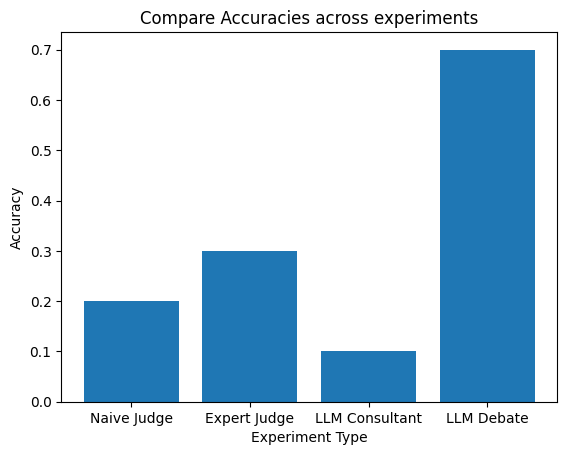

In [19]:
# Build the plot
x_values = [ "Naive Judge", "Expert Judge", "LLM Consultant", "LLM Debate"]
y_values = [ accuracy_naive_judge, accuracy_expert_judge, accuracy_consultant_judge, accuracy_debate_judge]
plt.bar(x_values, y_values)
plt.title('Compare Accuracies across experiments')
plt.xlabel('Experiment Type')
plt.ylabel('Accuracy')
 
plt.show()

### <a name="6">Choose expert LLM using Win Rate measured during LLM Debate (Experiment 4) </a>
(<a href="#0">Go to top</a>)

With this win rate of expert models, we emprically understand which LLM as a debater is more successful than the other.

In [20]:
claude_avg_win_rate, mixtral_avg_win_rate = get_win_rate_per_model(
    debate_judge_regular_answers, 
    debate_judge_flipped_answers)

most_common_regular_value =True , regular_count = 5
most_common_flipped_value =True , flipped_count = 8

 claude_regular_win_rate :: 0.5 
                
 mistral_regular_win_rate :: 0.5 
                
 claude_flipped_win_rate :: 0.8
                
 mistral_flipped_win_rate :: 0.19999999999999996 


In [21]:
win_rate_comparison(claude_avg_win_rate, mixtral_avg_win_rate)

,Claude Win Rate,Mixtral Win Rate
0,0.65,0.35


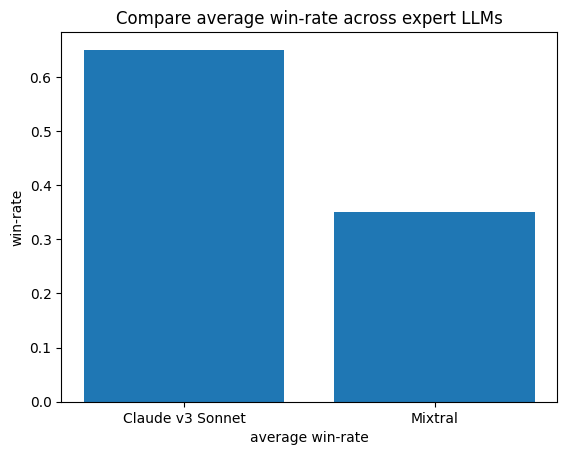

In [22]:
# Build the plot
%matplotlib inline
x_values = [ "Claude v3 Sonnet", "Mixtral"]
y_values = [claude_avg_win_rate, mixtral_avg_win_rate]
plt.bar(x_values, y_values)
plt.title('Compare average win-rate across expert LLMs')
plt.xlabel('average win-rate')
plt.ylabel('win-rate')
 
plt.show()